# **[Chapter 04]**  
**┗ 공기질 데이터 (Time series) 분석**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* Data Info Check
* 🥉Session 1 - 「Data Readiness Check」
* 🥈Session 2 - 「EDA」
* 🥇Session 3 - 「Modeling」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter04")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter04'

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
2차 산업혁명 이후 전 지구상의 대기질은 지속적으로 나빠지고 있다.
공기질에 영향을 미치는 다양한 Feature 분석해보자.
Regression 모델링을 이용하여 다양한 변수와 상대습도의 상관관계를 학습하는 모델을 만들어 보도록 하자.
```



> **데이터 살펴보기**

* 상대습도 정보와 대기 내 포함된 정보
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|Date|날짜 (DD/MM/YYYY)
|Time|시각 (HH.MM.SS)|
|CO(GT)|CO in mg/m^3|
|PT08.S1|tin oxide|
|NMHC(GT)|Non Metanic HydroCarbons|
|C6H6(GT)|Benzene in microg/m^3|
|PT08.S2(NMHC)|titania|
|NOx (GT)|ppb|
|PT08.S3(NOx)|tungsten oxide|
|NO2(GT)|NO2 microg/m^3|
|PT08.S4(NO2)|tungsten oxide|
|PT08.S5(O3)|indium oxide|
|T|Temperature|
|RH|Relative Humidity|
|AH|Absolute Humidity|

# **Data Spec Check**
---
> **Data 가공 명세서** 

<img src = "https://drive.google.com/uc?id=15iIfM_4v8EHwZr-ppk_eiuRQnw-UdDnU">

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 공기질에 영향을 미치는 데이터들이 어떤 특성에 영향을 받는지 분석해보자.
```  

> **기대효과**

```
▶ 대기를 구성하고 있는 성분을 통해 상대 습도에 대한 예측이 가능하다면 다양한 분야에 접목가능 할 것이다.
```

> **해결방안**

```
▶ 다양한 Regression 방법 적용을 통한 영향 정도 분석
▶ Session 1 🥉
 - 결측 데이터 처리하기
 - 문자열 데이터 -> 날짜형 데이터로 처리하기
▶ Session 2 🥈
 - 데이터 시각화
▶ Session 3 🥇
 - Linear regression, Logistic regeression, Decision tree
 - Random forest, Support Vector Machine
```

> **성과측정**  

```
▶ 각 모델 기법의 에러량
```

> **현업적용**  

```
▶ 제조업에서는 습도 관리가 필수, 습도의 변화를 분석할 수 있는 역량 강화
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Missing value, to_datetime
▶ Session 2 → Scatter plot, line plot, heat map
▶ Session 3 → 다양한 Regression 기법들
```

# Data Info Check

In [70]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

#loading dataset
df = pd.read_csv('data/AirQualityUCI.csv')#, header=None)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [72]:
#Defining col numbers
r = list(np.arange(len(col)))
df1 = pd.read_csv('data/AirQualityUCI.csv', header=None, skiprows=1, names=col, na_filter=True,
                   na_values=-100, usecols=r)
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [73]:
df1.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [75]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


array([[<AxesSubplot:title={'center':'CO_GT'}>,
        <AxesSubplot:title={'center':'PT08_S1_CO'}>,
        <AxesSubplot:title={'center':'NMHC_GT'}>,
        <AxesSubplot:title={'center':'C6H6_GT'}>],
       [<AxesSubplot:title={'center':'PT08_S2_NMHC'}>,
        <AxesSubplot:title={'center':'NOX_GT'}>,
        <AxesSubplot:title={'center':'PT08_S3_NOX'}>,
        <AxesSubplot:title={'center':'NO2_GT'}>],
       [<AxesSubplot:title={'center':'PT08_S4_NO2'}>,
        <AxesSubplot:title={'center':'PT08_S5_O3'}>,
        <AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'AH'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'HOUR'}>, <AxesSubplot:>]],
      dtype=object)

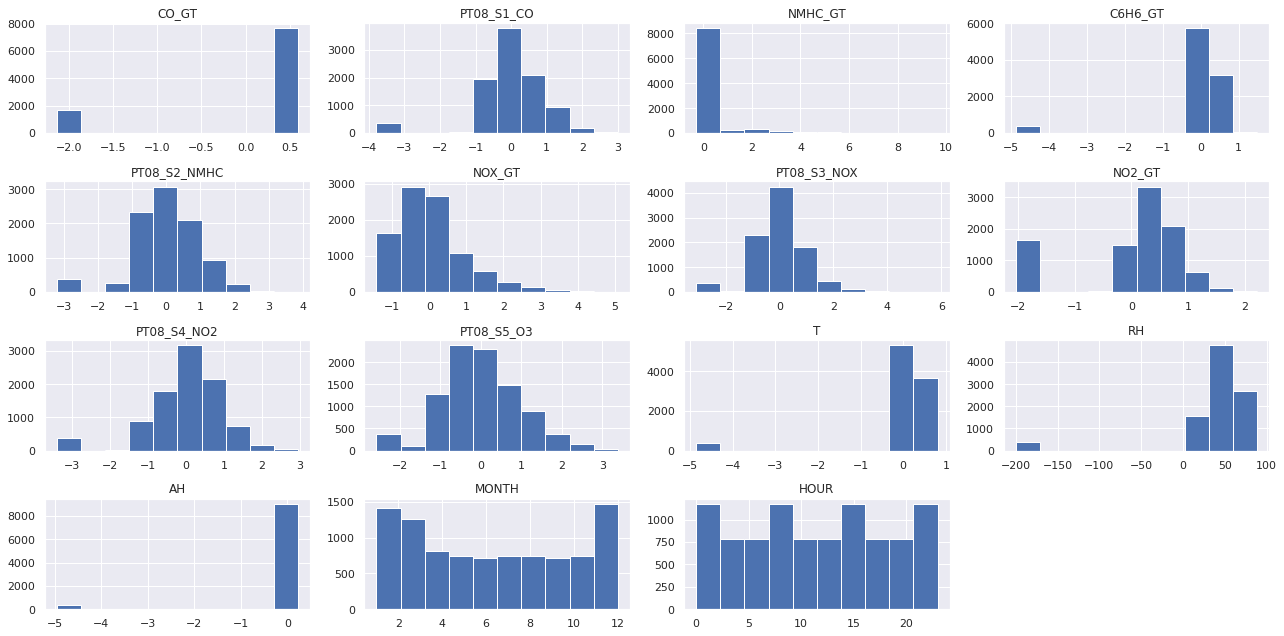

In [60]:
df1.drop(['DATE'], axis=1).hist(figsize=(18,9))

# **🥉Session 1**  
**┗ Data Readiness Check**  
---

## · Data Readiness Check
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) 추가 컬럼 생성

In [7]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [76]:
col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
df1 = pd.read_csv('data/AirQualityUCI.csv', header=None, skiprows=1, names=col, na_filter=True,
                   na_values=-100, usecols=r)
df1

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#  Data 형태 확인
#  9357 row, 17 col로 구성됨
print('df :', df1.shape)

df : (9471, 15)


In [78]:
# Data type 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [79]:
9471-9357

114

In [80]:
# Target이 NaN인 데이터 탐색
df1[df1['RH'].isna()].head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#  NaN 데이터 삭제
df1.dropna(how='all', inplace=True)
df1.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9347,04-04-2005,05:00:00,0.5,888.0,-200.0,1.3,528.0,77.0,1077.0,53.0,987.0,578.0,10.4,59.9,0.7550
9348,04-04-2005,06:00:00,1.1,1031.0,-200.0,4.4,730.0,182.0,760.0,93.0,1129.0,905.0,9.5,63.1,0.7531
9349,04-04-2005,07:00:00,4.0,1384.0,-200.0,17.4,1221.0,594.0,470.0,155.0,1600.0,1457.0,9.7,61.9,0.7446
9350,04-04-2005,08:00:00,5.0,1446.0,-200.0,22.4,1362.0,586.0,415.0,174.0,1777.0,1705.0,13.5,48.9,0.7553
9351,04-04-2005,09:00:00,3.9,1297.0,-200.0,13.6,1102.0,523.0,507.0,187.0,1375.0,1583.0,18.2,36.3,0.7487
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [85]:
#We could see NaN values in tail
df1.tail(130)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9227,30-03-2005,05:00:00,0.5,901.0,-200.0,2.1,589.0,122.0,933.0,70.0,1109.0,754.0,10.2,77.9,0.9692
9228,30-03-2005,06:00:00,0.8,948.0,-200.0,3.8,702.0,146.0,801.0,78.0,1164.0,818.0,11.0,73.1,0.9554
9229,30-03-2005,07:00:00,2.3,1250.0,-200.0,12.6,1069.0,397.0,532.0,106.0,1457.0,1202.0,10.7,73.6,0.9439
9230,30-03-2005,08:00:00,2.9,1263.0,-200.0,14.7,1138.0,371.0,503.0,117.0,1533.0,1296.0,12.1,67.3,0.9499
9231,30-03-2005,09:00:00,3.1,1319.0,-200.0,15.5,1164.0,454.0,489.0,144.0,1543.0,1418.0,15.1,58.6,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [86]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [87]:
df1.shape

(9357, 15)

In [88]:
#Counting Missing Values from each Column
print('Missing values:\n\n', df1.shape[0]-df1.count())
clean = (df1.shape[0] - df1.count()).sum()
print("\n")
if clean == 0:
    print("No Missing Values")


Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


# 🥈Session 2
**┗ Feature Engineering**  
---

In [92]:
# Feature Engineering 추가
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
obj_cols = df1.select_dtypes(include=object).columns.tolist()

num_cols.remove('RH')

scaler = StandardScaler()
df1_obj = df1[obj_cols]
df1_scaled = scaler.fit_transform(df1[num_cols])
df_1_scaled = pd.DataFrame(df1_scaled, index=df1.index, columns=num_cols)
df1 = pd.concat([df_1_scaled, df1['RH'], df1_obj], axis=1)

In [91]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [93]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,RH
count,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000
mean,1.032744e-16,-9.416191e-17,1.214992e-17,0.000000,6.682458e-17,-2.429985e-17,1.214992e-16,4.859970e-17,2.186986e-16,-1.974363e-17,-1.366866e-17,-9.112443e-18,39.485380
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,51.216145
min,-2.135042e+00,-3.786940e+00,-2.926701e-01,-4.878576,-3.197626e+00,-1.431966e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-4.956111e+00,-200.000000
25%,4.482443e-01,-3.880661e-01,-2.926701e-01,0.051581,-5.363344e-01,-4.607914e-01,-4.906887e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596437e-02,1.932003e-01,34.100000
50%,4.598343e-01,1.215814e-02,-2.926701e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238134e-02,1.717933e-01,2.005000e-01,48.600000
75%,4.739999e-01,5.215345e-01,-2.926701e-01,0.283588,6.146524e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,2.086951e-01,61.900000
max,5.937634e-01,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090445e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,2.326799e-01,88.700000


In [90]:
obj_cols

['DATE', 'TIME']

In [94]:
df1

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,RH,DATE,TIME
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.194881,48.9,10-03-2004,18:00:00
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.194052,47.7,10-03-2004,19:00:00
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.194686,54.0,10-03-2004,20:00:00
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.195622,60.0,10-03-2004,21:00:00
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.195676,59.6,10-03-2004,22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.480439,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.280586,0.194855,29.3,04-04-2005,10:00:00
9353,0.471424,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.336140,0.193703,23.7,04-04-2005,11:00:00
9354,0.471424,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.396323,0.191874,18.3,04-04-2005,12:00:00
9355,0.467561,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,0.428730,0.188623,13.5,04-04-2005,13:00:00


In [19]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,RH
count,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000
mean,1.032744e-16,-9.416191e-17,1.214992e-17,0.000000,6.682458e-17,-2.429985e-17,1.214992e-16,4.859970e-17,2.186986e-16,-1.974363e-17,-1.366866e-17,-9.112443e-18,39.485380
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,51.216145
min,-2.135042e+00,-3.786940e+00,-2.926701e-01,-4.878576,-3.197626e+00,-1.431966e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-4.956111e+00,-200.000000
25%,4.482443e-01,-3.880661e-01,-2.926701e-01,0.051581,-5.363344e-01,-4.607914e-01,-4.906887e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596437e-02,1.932003e-01,34.100000
50%,4.598343e-01,1.215814e-02,-2.926701e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238134e-02,1.717933e-01,2.005000e-01,48.600000
75%,4.739999e-01,5.215345e-01,-2.926701e-01,0.283588,6.146524e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,2.086951e-01,61.900000
max,5.937634e-01,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090445e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,2.326799e-01,88.700000


In [95]:
df1 = df1[col]
df1

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881
1,10-03-2004,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052
2,10-03-2004,20:00:00,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,54.0,0.194686
3,10-03-2004,21:00:00,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,60.0,0.195622
4,10-03-2004,22:00:00,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,59.6,0.195676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,0.480439,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.280586,29.3,0.194855
9353,04-04-2005,11:00:00,0.471424,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.336140,23.7,0.193703
9354,04-04-2005,12:00:00,0.471424,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.396323,18.3,0.191874
9355,04-04-2005,13:00:00,0.467561,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,0.428730,13.5,0.188623


In [107]:
df1['DATE'] = pd.to_datetime(df1.DATE, format='%d-%m-%Y')
df1['MONTH'] = df1['DATE'].dt.month  
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881,18,3
1,2004-03-10,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052,19,3
2,2004-03-10,20:00:00,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,54.0,0.194686,20,3
3,2004-03-10,21:00:00,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,60.0,0.195622,21,3
4,2004-03-10,22:00:00,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,59.6,0.195676,22,3
5,2004-03-10,23:00:00,0.455971,0.448766,1.409986,0.068498,-0.422404,-0.309288,1.683384,0.298196,0.003254,-0.057061,0.032909,59.2,0.195574,23,3
6,2004-03-11,00:00:00,0.455971,0.412382,1.359908,0.041914,-0.597681,-0.414175,2.071611,0.148512,-0.125174,-0.529798,0.035223,56.8,0.194945,0,3
7,2004-03-11,01:00:00,0.453395,0.263814,1.359908,0.034664,-0.650265,-0.414175,2.043659,0.140634,-0.125174,-0.536364,0.021335,60.0,0.195199,1,3
8,2004-03-11,02:00:00,0.452108,0.136470,1.309829,0.010496,-0.834306,-0.480215,2.434992,0.014583,-0.247182,-0.777110,0.021335,59.7,0.195061,2,3
9,2004-03-11,03:00:00,0.448244,-0.118218,1.274059,-0.004004,-0.974527,-1.431966,2.826325,-2.033730,-0.334941,-1.037553,0.012076,60.2,0.194724,3,3


In [96]:
a = [1,2,3,4,5]
for idx, i in enumerate(a):
  a[idx] = i + 1
a

[2, 3, 4, 5, 6]

In [101]:
%%timeit
for idx, data in enumerate(df1.iterrows()):
  i = idx

360 ms ± 89.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
%%timeit
df1.apply(lambda x: x)

4.57 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
df1['HOUR'] = df1['TIME'].apply(lambda x: int(x.split(':')[0])) #13:00:00
df1.HOUR.head(10)

0    18
1    19
2    20
3    21
4    22
5    23
6     0
7     1
8     2
9     3
Name: HOUR, dtype: int64

In [139]:
df1

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881,18,3
1,2004-03-10,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052,19,3
2,2004-03-10,20:00:00,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,54.0,0.194686,20,3
3,2004-03-10,21:00:00,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,60.0,0.195622,21,3
4,2004-03-10,22:00:00,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,59.6,0.195676,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,0.480439,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.280586,29.3,0.194855,10,4
9353,2005-04-04,11:00:00,0.471424,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.336140,23.7,0.193703,11,4
9354,2005-04-04,12:00:00,0.471424,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.396323,18.3,0.191874,12,4
9355,2005-04-04,13:00:00,0.467561,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,0.428730,13.5,0.188623,13,4


## · EDA

In [24]:
sns.set(rc={'figure.figsize':(14, 9)})
#plt.figure(figsize=(12,9))

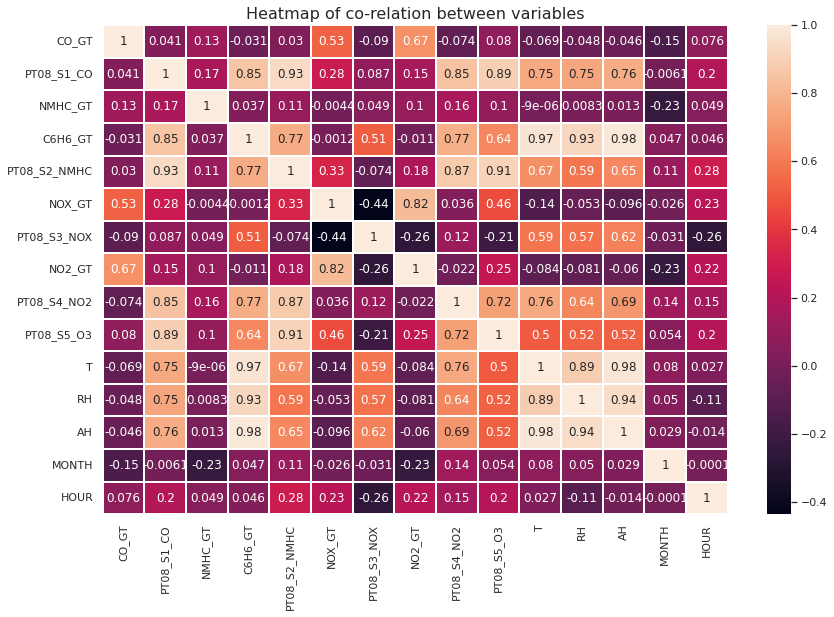

In [25]:
sns.heatmap(df1.corr(), annot=True, linewidths=.4)
plt.title('Heatmap of co-relation between variables', fontsize=16)
plt.show()

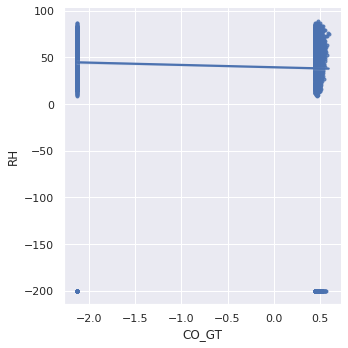

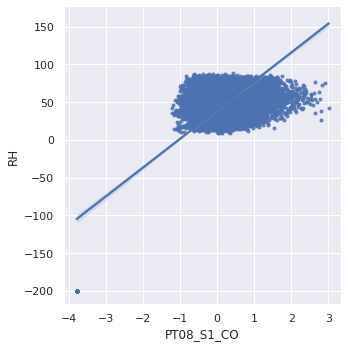

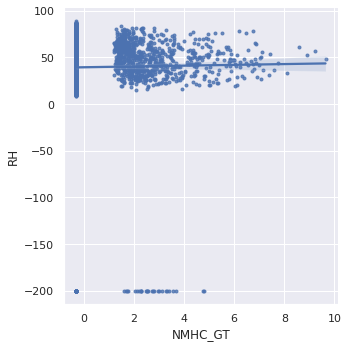

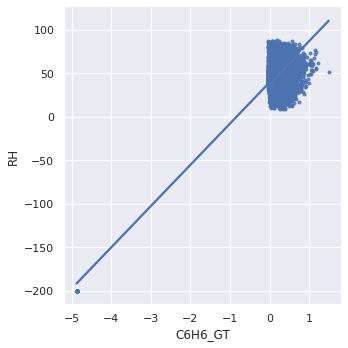

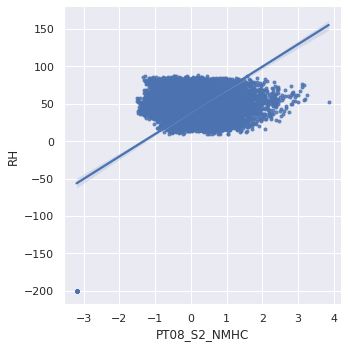

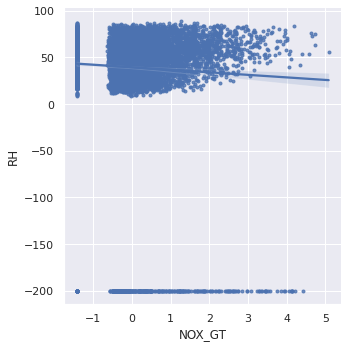

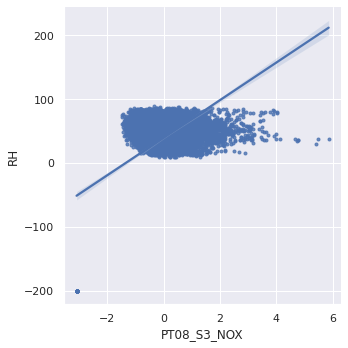

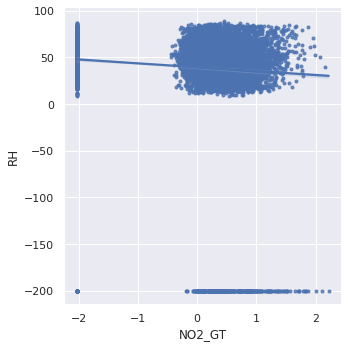

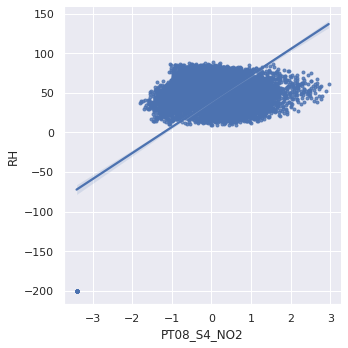

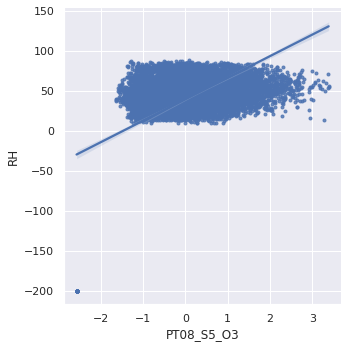

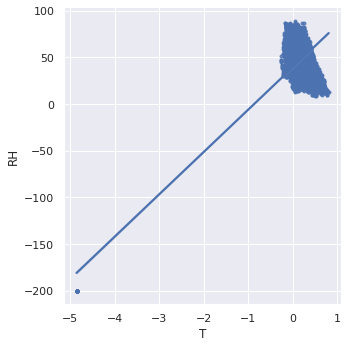

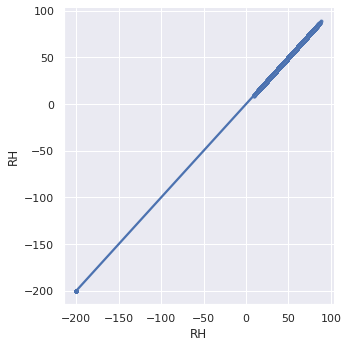

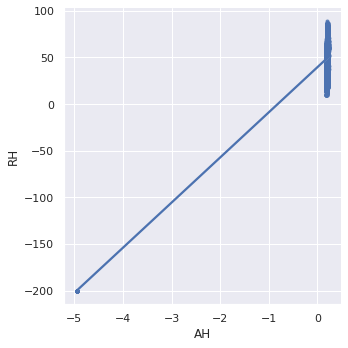

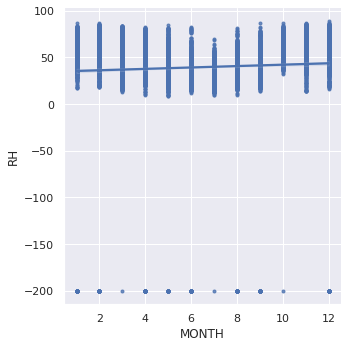

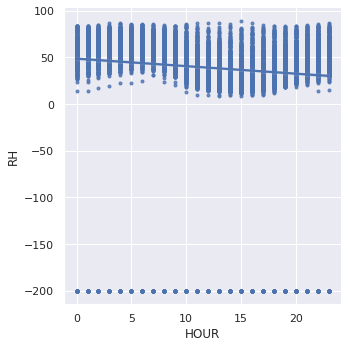

In [26]:
plt.rcParams["figure.autolayout"] = True
col1 = df1.columns.tolist()[2:]
for i in df1.columns.tolist()[2:]:
    sns.lmplot(x=i, y='RH', data=df1, markers='.')

# 🥇Session 3
**┗ Modeling**  
---

## · Linear Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [108]:
X = df1[col1].drop('RH',1)     
Y = df1['RH']   
SScaler = StandardScaler()
Xsd = SScaler.fit_transform(X)    #applying stardardisation
X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,MONTH,HOUR
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.194881,3,18
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.194052,3,19
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.194686,3,20
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.195622,3,21
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.195676,3,22


In [109]:
Y.head()

0    48.9
1    47.7
2    54.0
3    60.0
4    59.6
Name: RH, dtype: float64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(Xsd, Y, test_size=0.4, random_state=3)

In [111]:
#Data-Size
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

Training Data Size: (5614, 14)
Test Data Size: (3743, 14)


In [112]:
model= LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [114]:
print('Intercept:',model.intercept_)

Intercept: 39.61360919963028


In [115]:
prediction = model.predict(X_test)
prediction

array([67.22290966, 71.82740726, 49.33816742, ..., 28.00031218,
       69.38704067, 61.75363791])

In [116]:
y_test

6432     71.7
1452     67.4
7516     55.0
4856     53.4
1075     32.1
        ...  
7204   -200.0
1759     56.2
4868     28.5
6328     68.5
4113     64.6
Name: RH, Length: 3743, dtype: float64

In [117]:
print("Co-efficient:")
list(zip(X.columns,model.coef_))

Co-efficient:


[('CO_GT', 0.15911444848919443),
 ('PT08_S1_CO', 7.618162531383154),
 ('NMHC_GT', -1.9199932762049632),
 ('C6H6_GT', -35.41618220773113),
 ('PT08_S2_NMHC', -19.15974844721351),
 ('NOX_GT', 4.261893918921055),
 ('PT08_S3_NOX', -6.679792565838307),
 ('NO2_GT', -3.058575375790467),
 ('PT08_S4_NO2', 25.734049028041067),
 ('PT08_S5_O3', -1.392015298489039),
 ('T', -91.46496876948301),
 ('AH', 166.65449965998883),
 ('MONTH', 4.0082340846817655),
 ('HOUR', -0.7360723849731232)]

In [118]:
#Root Mean Square Error
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rs)

6.971622985617292


## · Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [120]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_y = lab_enc.fit_transform(y_train)
training_y

array([186,  36,  82, ..., 691, 394, 248])

In [121]:
model1.fit(X_train,training_y)

LogisticRegression()

In [122]:
prediction1 = model1.predict(X_test) 
prediction1

array([566, 390, 312, ..., 125, 639, 541])

In [123]:
#Root Mean Square Error
from sklearn import metrics
rs1 = np.sqrt(metrics.mean_squared_error(y_test, prediction1))
print(rs1)

341.6004938919109


## · Decision Tree Regression

In [124]:
from sklearn.tree import DecisionTreeRegressor  
model2=DecisionTreeRegressor( )

In [125]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [126]:
prediction2 = model2.predict(X_test) 
prediction2

array([75.9, 67. , 54.5, ..., 27.9, 67.6, 62.3])

In [127]:
from sklearn import metrics
rs2 = np.sqrt(metrics.mean_squared_error(y_test, prediction2))
print(rs2)

1.4233661321457176


## · Random Forest Regression

In [128]:
from sklearn.ensemble import RandomForestRegressor          
model3 = RandomForestRegressor()

In [129]:
model3.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
prediction3 = model3.predict(X_test) 
prediction3

array([72.558, 67.185, 53.47 , ..., 28.084, 68.259, 64.348])

In [131]:
#Root Mean Square Error
from sklearn import metrics
rs3 = np.sqrt(metrics.mean_squared_error(y_test, prediction3))
print(rs3)

0.7006779807069788


## · Support Vector Machine

In [132]:
from sklearn.svm import SVR          
model4 = SVR()

In [133]:
model4.fit(X_train, y_train)

SVR()

In [134]:
prediction4 = model4.predict(X_test) 
prediction4

array([63.57208768, 54.31643596, 48.07740468, ..., 36.60617946,
       61.39761076, 56.67322655])

In [135]:
#Root Mean Square Error
from sklearn import metrics
rs4 = np.sqrt(metrics.mean_squared_error(y_test, prediction4))
print(rs4)

24.505288163741934


## · Results

In [136]:
print("Linear Regression=", rs, "\n")
print("Logistic Regression=", rs1, "\n")
print("Decision Tree Regression=", rs2, "\n")
print("Random Forest Regression=", rs3, "\n")
print("Support Vector Machine Regression=", rs4, "\n")

Linear Regression= 6.971622985617292 

Logistic Regression= 341.6004938919109 

Decision Tree Regression= 1.4233661321457176 

Random Forest Regression= 0.7006779807069788 

Support Vector Machine Regression= 24.505288163741934 



In [138]:
dict = {"Linear Regression": rs,"Logistic Regression": rs1,"Decision Tree Regression": rs2,"Random Forest Regression": rs3, "Support Vector Machine Regression":rs4   }
res =  [key for key in dict if 
        all(dict[temp] >= dict[key] 
        for temp in dict)] 
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)

{'Random Forest Regression': 0.7006779807069788}


# Lesson and Learned

## 수많은 Regression 방법들, 그 중에서 뭘로 시작할까?

### 1. 모델에 사용되는 데이터들은 연속형 데이터가 대부분인데, 결과는 Binary이거나 Binary 형태로 변형이 가능할 때 -> Logistict Regression
### 2. 데이터들이 연속형과 범주형이 섞여있을때 -> Random Forest
### 3. 데이터들이 대부분 범주형일 때 -> Catboost

## 이번 챕터에서는 결과인 RH가 연속형 변수이므로 Logistic Regression의 결과가 낮게 나왔음. Logistic Regression이 나쁜 모델이 아니라, 현재 데이터와 맞지 않는 알고리즘
### Feature 변수 대부분이 연속형 변수이기 때문에 Linear Regression도 좋은 성능을 보이지만, 일부 변수들이 범주형 성격을 갖고 있는 변수이기 때문에 Random Forest가 가장 좋은 결과가 나옴
#### ※ 현재 시점까지의 데이터를 이용해서 한 모델링 결과는 이렇지만, 지속적으로 생성되는 추가 데이터에 대한 모니터링이 필수